
###### <p> <center> Turing</center> </p>
###### <p> <center> Interviewer: Mukul Joshi</center> </p>
###### <p> <center> Interviewee: Mramba Nkalang'ango</center> </p>

###### Assignment: Data Analysis on London BnB listings.

Your analysis will be based on
(1) Business value of the
finding 
(2) How non-obvious
the insights are both positive
as well as negative results are
interesting to us if you can
justify why the hypothesis was
prospectively).

Give us a clear 1-2 page clear
summary of your analysis. This
should be of interest to both
(1) business people who are
not data scientists as well as
(2) data scientists who would
be interested in some technical
depth.

###### <p> Data Source: http://data.insideairbnb.com/united-kingdom/england/london/2021-02-09/data/listings.csv.gz </P>

In [1]:
# Importing important module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset in a dataframe using Pandas
# Data source: http://data.insideairbnb.com/united-kingdom/england/london/2021-02-09/data/listings.csv.gz 
# Converting csv to panda dataframe
df = pd.read_csv("listings.csv")

###### 1: Data Exploration

In [3]:
# Viewing 5 records of the dataframe
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20210209201301,2021-02-12,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,10.0,9.0,9.0,NaN,f,2,1,1,0,0.16
1,15400,https://www.airbnb.com/rooms/15400,20210209201301,2021-02-12,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,10.0,10.0,9.0,NaN,t,1,1,0,0,0.66
2,17402,https://www.airbnb.com/rooms/17402,20210209201301,2021-02-12,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,9.0,10.0,9.0,NaN,f,15,15,0,0,0.35
3,17506,https://www.airbnb.com/rooms/17506,20210209201301,2021-02-12,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
4,25123,https://www.airbnb.com/rooms/25123,20210209201301,2021-02-13,Clean big Room in London (Room 1),Big room with double bed/ clean sheets/ clean ...,Barnet is one of the largest boroughs in Londo...,https://a0.muscache.com/pictures/456905/a004b9...,103583,https://www.airbnb.com/users/show/103583,...,10.0,9.0,10.0,NaN,t,3,0,3,0,0.98


In [4]:
# checking column names
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [5]:
# The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the DataFrame.
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.653400e+04,7.653400e+04,7.653400e+04,76488.000000,76488.000000,0.0,76534.000000,76534.000000,76534.000000,0.0,...,52488.000000,52537.000000,52489.000000,52488.00000,0.0,76534.000000,76534.000000,76534.000000,76534.000000,54340.000000
mean,2.608547e+07,2.021021e+13,9.737649e+07,24.551982,24.551982,NaN,51.510066,-0.128113,3.041237,NaN,...,9.650720,9.670632,9.558365,9.30285,NaN,20.896621,17.543693,2.801043,0.037395,0.571656
std,1.353230e+07,1.634776e+01,1.026857e+08,134.118472,134.118472,NaN,0.047620,0.094883,1.938889,NaN,...,0.933248,0.931965,0.870299,1.08223,NaN,99.725744,96.391546,17.238188,0.512463,0.818797
min,1.391300e+04,2.021021e+13,2.010000e+03,0.000000,0.000000,NaN,51.297330,-0.510220,0.000000,NaN,...,2.000000,2.000000,2.000000,2.00000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.526331e+07,2.021021e+13,1.636504e+07,1.000000,1.000000,NaN,51.484460,-0.188307,2.000000,NaN,...,10.000000,10.000000,9.000000,9.00000,NaN,1.000000,0.000000,0.000000,0.000000,0.100000
50%,2.624784e+07,2.021021e+13,5.012855e+07,1.000000,1.000000,NaN,51.514250,-0.125730,2.000000,NaN,...,10.000000,10.000000,10.000000,10.00000,NaN,1.000000,1.000000,1.000000,0.000000,0.290000
75%,3.833904e+07,2.021021e+13,1.567602e+08,3.000000,3.000000,NaN,51.539520,-0.069172,4.000000,NaN,...,10.000000,10.000000,10.000000,10.00000,NaN,4.000000,1.000000,1.000000,0.000000,0.730000
max,4.810299e+07,2.021021e+13,3.876413e+08,7235.000000,7235.000000,NaN,51.679980,0.288570,16.000000,NaN,...,10.000000,10.000000,10.000000,10.00000,NaN,872.000000,871.000000,256.000000,18.000000,26.310000


In [6]:
# Printing a concise summary of a DataFrame. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76534 entries, 0 to 76533
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            76534 non-null  int64  
 1   listing_url                                   76534 non-null  object 
 2   scrape_id                                     76534 non-null  int64  
 3   last_scraped                                  76534 non-null  object 
 4   name                                          76510 non-null  object 
 5   description                                   73372 non-null  object 
 6   neighborhood_overview                         46750 non-null  object 
 7   picture_url                                   76534 non-null  object 
 8   host_id                                       76534 non-null  int64  
 9   host_url                                      76534 non-null 

In [7]:
# Dimensionality of the DataFrame.
df.shape

(76534, 74)

In [8]:
# The dataframe has 76534 rows and 74 columns

In [9]:
df.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               24
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               22194
Length: 74, dtype: int64

###### The dataframe has 24 and 22194 null values on columns "name" and reviews_per_month respectively 

###### 2: Data Cleaning

In [10]:
# removing all rows with NaN, that is null values
df.dropna(axis=0)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [11]:
# check the dataframe after removing the NaN rows
df.head(10)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20210209201301,2021-02-12,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,10.0,9.0,9.0,NaN,f,2,1,1,0,0.16
1,15400,https://www.airbnb.com/rooms/15400,20210209201301,2021-02-12,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,10.0,10.0,9.0,NaN,t,1,1,0,0,0.66
2,17402,https://www.airbnb.com/rooms/17402,20210209201301,2021-02-12,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,9.0,10.0,9.0,NaN,f,15,15,0,0,0.35
3,17506,https://www.airbnb.com/rooms/17506,20210209201301,2021-02-12,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
4,25123,https://www.airbnb.com/rooms/25123,20210209201301,2021-02-13,Clean big Room in London (Room 1),Big room with double bed/ clean sheets/ clean ...,Barnet is one of the largest boroughs in Londo...,https://a0.muscache.com/pictures/456905/a004b9...,103583,https://www.airbnb.com/users/show/103583,...,10.0,9.0,10.0,NaN,t,3,0,3,0,0.98
5,33332,https://www.airbnb.com/rooms/33332,20210209201301,2021-02-13,Beautiful Ensuite Richmond-upon-Thames borough,"Walking distance to Twickenham Stadium, 35 min...",Peaceful and friendly.,https://a0.muscache.com/pictures/f78bf957-01ee...,144444,https://www.airbnb.com/users/show/144444,...,10.0,10.0,8.0,NaN,f,1,0,1,0,0.05
6,36299,https://www.airbnb.com/rooms/36299,20210209201301,2021-02-13,Kew Gardens 3BR house in cul-de-sac,3 Bed House with garden close to Thames river ...,"Residential family neighborhood, with both Eng...",https://a0.muscache.com/pictures/457052/6e819d...,155938,https://www.airbnb.com/users/show/155938,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.63
7,36660,https://www.airbnb.com/rooms/36660,20210209201301,2021-02-13,You are GUARANTEED to love this,<b>The space</b><br />This room is located on ...,NaN,https://a0.muscache.com/pictures/7472240/ec624...,157884,https://www.airbnb.com/users/show/157884,...,10.0,10.0,10.0,NaN,t,1,0,1,0,4.16
8,36986,https://www.airbnb.com/rooms/36986,20210209201301,2021-02-12,Gorgeous Victorian Flat Overlooking London Fields,Situated literally in London Fields park and o...,London Fields is one of the most vibrant and e...,https://a0.muscache.com/pictures/92102fc4-f6df...,159556,https://www.airbnb.com/users/show/159556,...,10.0,10.0,10.0,NaN,f,2,2,0,0,0.41
9,37384,https://www.airbnb.com/rooms/37384,20210209201301,2021-02-12,In the footsteps of William Blake..,<b>The space</b><br />South London - south of ...,NaN,https://a0.muscache.com/pictures/4562347/cffdc...,161459,https://www.airbnb.com/users/show/161459,...,10.0,9.0,10.0,NaN,f,1,0,1,0,0.43


In [12]:
# Removing columns with NaN
df = df.dropna(axis='columns')

In [13]:
# Dataframe after removing NaN
df.head(10)

,id,listing_url,scrape_id,last_scraped,picture_url,host_id,host_url,host_verifications,neighbourhood_cleansed,latitude,...,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,13913,https://www.airbnb.com/rooms/13913,20210209201301,2021-02-12,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,"['email', 'phone', 'facebook', 'reviews', 'off...",Islington,51.56802,...,365,2021-02-12,21,1,0,f,2,1,1,0
1,15400,https://www.airbnb.com/rooms/15400,20210209201301,2021-02-12,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,"['email', 'phone', 'reviews', 'jumio', 'govern...",Kensington and Chelsea,51.48796,...,189,2021-02-12,89,1,0,t,1,1,0,0
2,17402,https://www.airbnb.com/rooms/17402,20210209201301,2021-02-12,https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Westminster,51.52195,...,270,2021-02-12,42,0,0,f,15,15,0,0
3,17506,https://www.airbnb.com/rooms/17506,20210209201301,2021-02-12,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,"['email', 'phone', 'jumio', 'selfie', 'governm...",Hammersmith and Fulham,51.47935,...,364,2021-02-12,0,0,0,f,2,0,2,0
4,25123,https://www.airbnb.com/rooms/25123,20210209201301,2021-02-13,https://a0.muscache.com/pictures/456905/a004b9...,103583,https://www.airbnb.com/users/show/103583,"['email', 'phone', 'reviews', 'offline_governm...",Barnet,51.57224,...,43,2021-02-13,129,1,0,t,3,0,3,0
5,33332,https://www.airbnb.com/rooms/33332,20210209201301,2021-02-13,https://a0.muscache.com/pictures/f78bf957-01ee...,144444,https://www.airbnb.com/users/show/144444,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Hounslow,51.46507,...,365,2021-02-13,6,1,0,f,1,0,1,0
6,36299,https://www.airbnb.com/rooms/36299,20210209201301,2021-02-13,https://a0.muscache.com/pictures/457052/6e819d...,155938,https://www.airbnb.com/users/show/155938,"['email', 'phone', 'reviews', 'jumio', 'govern...",Richmond upon Thames,51.47934,...,236,2021-02-13,79,2,0,f,1,1,0,0
7,36660,https://www.airbnb.com/rooms/36660,20210209201301,2021-02-13,https://a0.muscache.com/pictures/7472240/ec624...,157884,https://www.airbnb.com/users/show/157884,"['email', 'phone', 'reviews', 'offline_governm...",Haringey,51.58461,...,365,2021-02-13,528,1,0,t,1,0,1,0
8,36986,https://www.airbnb.com/rooms/36986,20210209201301,2021-02-12,https://a0.muscache.com/pictures/92102fc4-f6df...,159556,https://www.airbnb.com/users/show/159556,"['email', 'phone', 'facebook', 'reviews', 'jum...",Hackney,51.53972,...,90,2021-02-12,52,0,0,f,2,2,0,0
9,37384,https://www.airbnb.com/rooms/37384,20210209201301,2021-02-12,https://a0.muscache.com/pictures/4562347/cffdc...,161459,https://www.airbnb.com/users/show/161459,"['email', 'phone', 'reviews']",Southwark,51.46871,...,364,2021-02-12,55,0,0,f,1,0,1,0


In [14]:
# Removing dollar sign ($) in the column price values
df['price'] = df['price'].str.replace('$', '')

In [15]:
# Removing (,) Thousand separator in the column price values
df['price'] = df['price'].str.replace(',', '')

In [16]:
# Check the df after removing $ and (,) characters
df['price'].head(10)

0     40.00
1     75.00
2    307.00
3    150.00
4     29.00
5     65.00
6    195.00
7     72.00
8     80.00
9     70.00
Name: price, dtype: object

In [17]:
df['price'].describe()

count     76534
unique      868
top       50.00
freq       2771
Name: price, dtype: object

In [18]:
#df2 = df['price]'.select_dtypes(include = ['float64', 'int64'])
#df2.head(5)

###### 3: Data Visualization through distributions

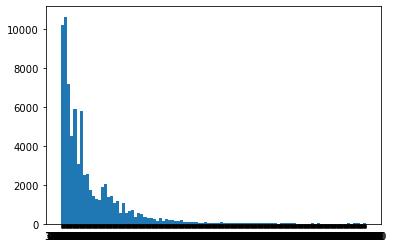

In [19]:
# Histogram:
plt.hist(df['price'], bins = 100)
plt.show()

###### The histogram shows that the distribution is skewed right

count     76534
unique      868
top       50.00
freq       2771
Name: price, dtype: object


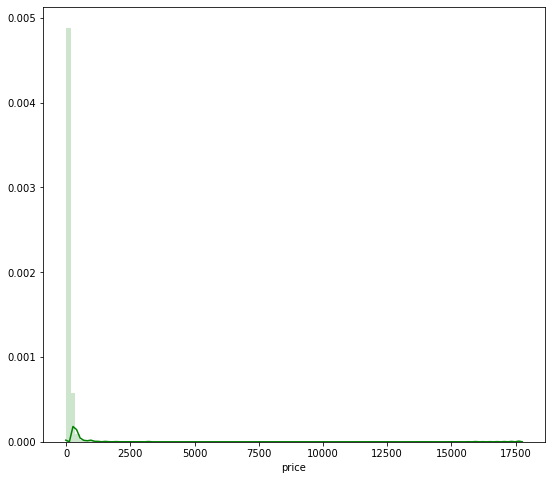

In [20]:
print(df['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['price'], color='g', bins=100, hist_kws={'alpha': 0.2});

###### The above chart shows the same result that the distribution is skewed right. this concludes that there are outliers